# Justin Dilabio

## At which BMI are people most most at risk of medical events and conditions?
### events/conditions iclude:
- stroke
- heart disease/heart attack
- high cholesterol
- diabetes (or pre)



In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import project_functions2
from project_functions2 import *

# milestone 2 

In [3]:
df = pd.read_csv("../HeartDisease.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.tail()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
65529,0.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,6.0
65530,0.0,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,14.0,1.0,0.0,12.0,4.0,4.0
65531,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,6.0,6.0
65532,0.0,0.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
65533,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,8.0


# Milestone 3
# Task 1:

the columns in this dataset that will be relevant to my research interest are listed:

- HighChol: 1 = yes, 0 = no
- Heart disease or attack : 1 = yes, 0 = no
- BMI : rounded to nearest integer
- stroke: 1 = stroke occured, 0 = none occured
- diabetes: 2 = diabetic, 1= pre diabetic, 0 = none
- high blood pressure: 1 = yes, 0 = no

In [5]:
df = pipeline("../HeartDisease.csv")


the mean BMI value is 27.92031720323315


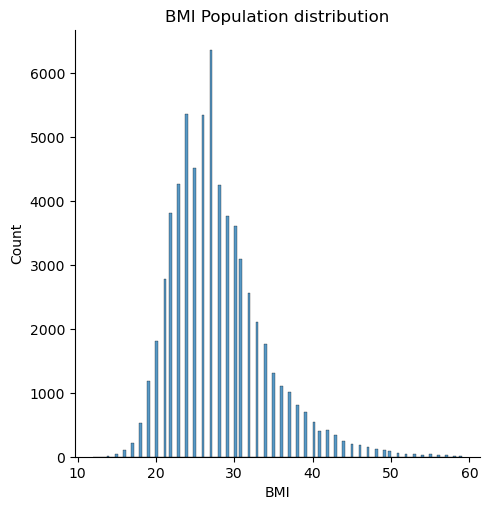

In [6]:
mean = np.mean(df["BMI"])
sns.displot(df['BMI'] ).set(title = "BMI Population distribution")
print(f"the mean BMI value is {mean}")

## BMI distribution
Plotted above is the distribution of BMI in the dataset. Most people are found in  the 25 to 35 range. with slight skew to the higher side. 

# Heart events and Stroke

Here, occurences are represented as a function of BMI. In blue, Heart disease/Heart Attack is represented, and in red, Stroke is shown. 

Text(0.5, 1.0, 'plot 1.1: BMI vs Medical Events')

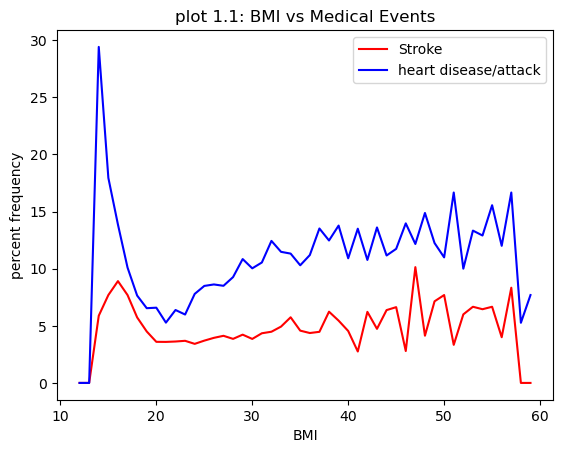

In [7]:
#sorted(list(df['BMI'].unique()))
plt.plot(df.groupby("BMI")['Stroke'].mean()*100 , label = "Stroke" ,color = 'red')

plt.plot(df.groupby("BMI")['HeartDiseaseorAttack'].mean()*100 ,color = 'Blue',label ="heart disease/attack" )
plt.xlabel("BMI")
plt.ylabel("percent frequency")
plt.legend(loc="upper right")
plt.title("plot 1.1: BMI vs Medical Events")

From this plot, we can see that those most at risk of both events are those at very low BMI, around 10-18. From about 20, there seems to be a small but steady linear increase. However stroke rates remain lower for BMI up to 30. 

Text(0.5, 1.0, 'Plot 1.2: BMI vs Medical Conditions')

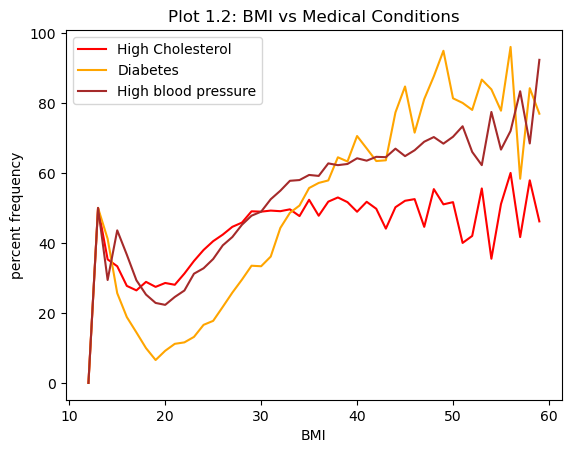

In [8]:
plt.plot(df.groupby("BMI")['HighChol'].mean()*100 , label = "High Cholesterol" ,color = 'red')
plt.plot(df.groupby("BMI")['Diabetes'].mean()*100 ,color = 'Orange',label ="Diabetes" )
plt.plot(df.groupby("BMI")['HighBP'].mean()*100 ,color = 'brown',label ="High blood pressure" )

plt.xlabel("BMI")
plt.ylabel("percent frequency")
plt.legend(loc="upper left")
plt.title("Plot 1.2: BMI vs Medical Conditions")

I can see from the plots, all explored occurence follow a similar pattern. All occurences tend to increase sharply at very low bmi. Around BMI = 18 to BMI = 22, events are lowest. All seem to gradually increase as BMI increases. However stroke rates remain low for BMI up to 30.

# Method Chaining

In [27]:
def pipeline(path):
   
    df = pd.read_csv(path)

    df = (
    df.loc[:,['HighBP','BMI','HighChol','Diabetes','HeartDiseaseorAttack','Stroke']]
    .loc[(HD["BMI"] <60)]
    )
    return df
    #this dataset contains very few bmi values above 60 which I suspect to be errors. 
# I have removed them since there are very few of data points with these values. 
#pl.pipeline("../HeartDisease.csv")
df = pipeline("../HeartDisease.csv")
print(df.head())
df.to_csv('/Users/justindilabio/Desktop/cosc301/project-group50/data/processed/cleanedData')

   HighBP   BMI  HighChol  Diabetes  HeartDiseaseorAttack  Stroke
0     1.0  40.0       1.0       0.0                   0.0     0.0
1     0.0  25.0       0.0       0.0                   0.0     0.0
2     1.0  28.0       1.0       0.0                   0.0     0.0
3     1.0  27.0       0.0       0.0                   0.0     0.0
4     1.0  24.0       1.0       0.0                   0.0     0.0


# Task 4

To begin, I plotted the BMI distribution of the population with which we are working. This revealed that in our sample, mos tof the individuals were within the 25-35 range, but a significant number of were above (see plot 1.1).

Next, to find who is most at risk of the recorded medical events int the dataset, I plotted the frequency of stroke and heart disease/attack (per 100 individuals) as a function of BMI. The shape of the plot revealed that those int the 10-17 range seemed to most frequently suffer from the medeical events. For Stroke, those between 20 and 30 were least at risk, and there was an linearly increasing risk as BMI increased. For heart attack/disease, those within the 20-25 range were the least at risk, and a linear increase was apparent beyond 25. 

Finally, a similar process was done to explore who is most at risk of diabetes, high blood pressure and high cholesterol. Those in the 10-15 range tended to suffer significantly more than the average, but those on the higher side suffered of these at a higher frequency. The individuals least at risk were in the 18-22 range. 

To answer my research question, from our data, those most at risk of medical events are the individuals in the 10-17 range, following by those with high BMI. Next, the people most at risk of the mentioned medical conditions were those with highest BMI, followed by those with very low BMI (10-15).

Putting everything in perspective, The association between BMI and health coditions is much higher than the association between BMI and health events(see figure 4.1). Both still have an apparent linear relationship. 

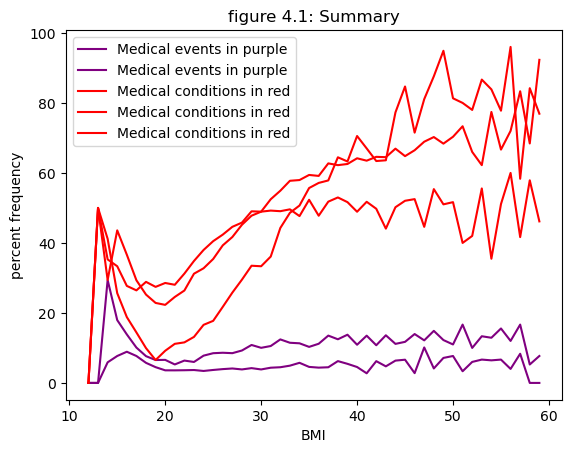

In [28]:
plt.plot(df.groupby("BMI")[['Stroke','HeartDiseaseorAttack']].mean()*100 , label = "Medical events in purple" ,color = 'purple')

plt.xlabel("BMI")
plt.ylabel("percent frequency")
plt.plot(df.groupby("BMI")[['HighChol','Diabetes','HighBP']].mean()*100 , label = "Medical conditions in red" ,color = 'red')

plt.xlabel("BMI")
plt.ylabel("percent frequency")
plt.title("figure 4.1: Summary")
plt.legend(loc="upper left")
